In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(-0.5, 127.5, 127.5, -0.5)

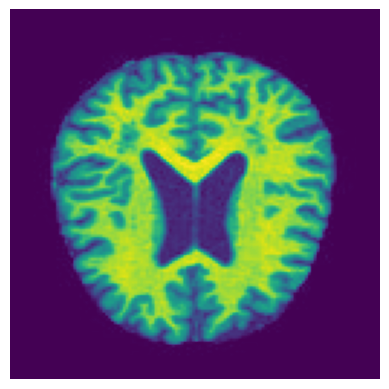

In [ ]:
img = plt.imread("/content/drive/MyDrive/Projects/Mini project/data/Dataset/Mild_Demented/mild_10.jpg")
plt.imshow(img)
plt.axis('off')

In [ ]:
width,height = (224,224)
width,height

(224, 224)

In [ ]:
class_dict = {0:"Mildly Demented",1:"Moderately Demented",2:"Non Demented",3:"Very Mildly Demented"}

In [ ]:
data_dir = '/content/drive/MyDrive/Projects/Mini project/data/Dataset'
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir,batch_size=32,validation_split=0.2,subset='training',
                                                       image_size=(width,height),seed=123)

Found 6400 files belonging to 4 classes.
Using 5120 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir,batch_size=32,image_size=(width,height),
                                                      validation_split=0.2,subset='validation',seed=123)

Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


In [ ]:
classes = train_ds.class_names
classes

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

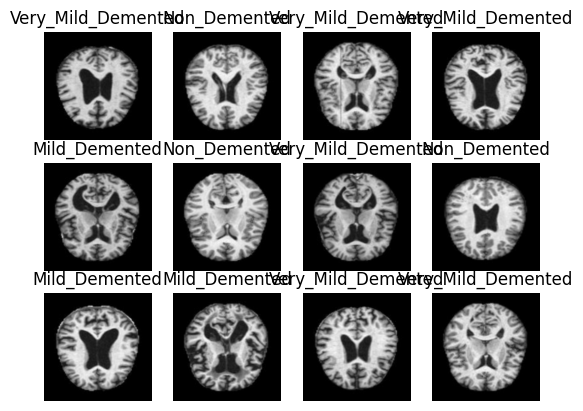

In [ ]:
for images,labels in train_ds.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(classes[labels[i]])

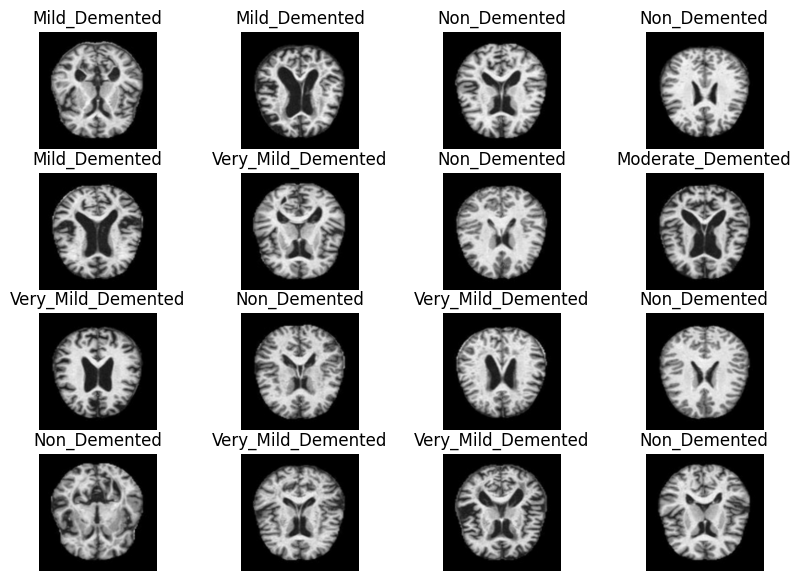

In [ ]:
fog,plots = plt.subplots(4,4,figsize=(10,7))
c = 0
for images,labels in train_ds.take(1):
    for i in range(4):
      for j in range(4):
        plots[i,j].imshow(images[c].numpy().astype('uint8'))
        plots[i,j].axis('off')
        plots[i,j].set_title(classes[labels[c]])
        c+=1

In [ ]:
for img,label in train_ds:
    print(img.shape)
    print(label.shape)
    break

(32, 224, 224, 3)
(32,)


In [ ]:
autotune = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=autotune)
val_ds = val_ds.cache().prefetch(buffer_size=autotune)

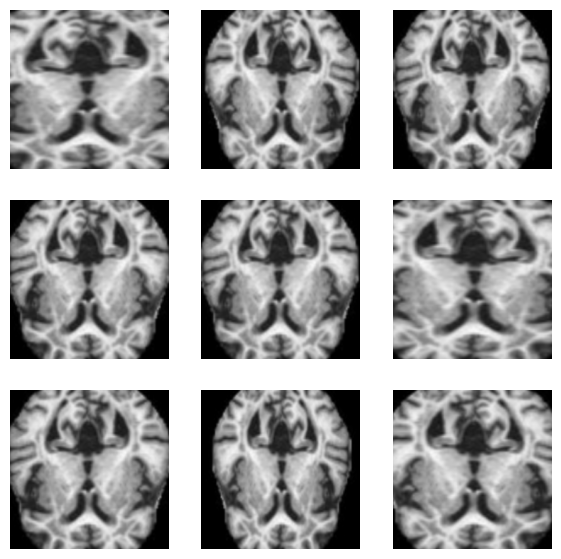

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomZoom(height_factor=(-0.3,-0.3),width_factor=(-0.5,-0.1))
])
plt.figure(figsize=(7, 7))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# Basic CNN model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1.0/255,input_shape=(width,height,3)),
    tf.keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='sigmoid'),
    tf.keras.layers.Dense(len(classes))
])

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)      

In [ ]:
history = model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10
160/160 [==============================] - 253s 2s/step - loss: 1.0323 - accuracy: 0.5184 - val_loss: 0.8678 - val_accuracy: 0.6109
Epoch 2/10
160/160 [==============================] - 8s 52ms/step - loss: 0.7690 - accuracy: 0.6520 - val_loss: 0.6338 - val_accuracy: 0.7203
Epoch 3/10
160/160 [==============================] - 8s 53ms/step - loss: 0.4740 - accuracy: 0.8053 - val_loss: 0.4312 - val_accuracy: 0.8289
Epoch 4/10
160/160 [==============================] - 9s 53ms/step - loss: 0.2493 - accuracy: 0.9043 - val_loss: 0.2408 - val_accuracy: 0.9109
Epoch 5/10
160/160 [==============================] - 8s 52ms/step - loss: 0.1060 - accuracy: 0.9674 - val_loss: 0.1755 - val_accuracy: 0.9297
Epoch 6/10
160/160 [==============================] - 8s 53ms/step - loss: 0.0401 - accuracy: 0.9898 - val_loss: 0.0923 - val_accuracy: 0.9719
Epoch 7/10
160/160 [==============================] - 9s 56ms/step - loss: 0.0212 - accuracy: 0.9953 - val_loss: 0.0978 - val_accuracy: 0.9680

In [ ]:
model.save_weights('bochu.h5')

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss = history.history['loss']
val_loss = history.history['val_loss']
ep_range = range(10)

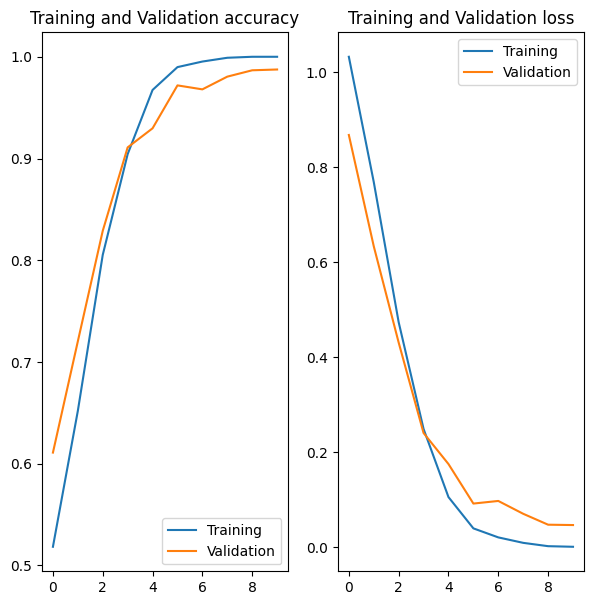

In [ ]:
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.title("Training and Validation accuracy")
plt.plot(ep_range,acc,label='Training')
plt.plot(ep_range,val_acc,label='Validation')
plt.legend(loc = "lower right")

plt.subplot(1,2,2)
plt.title("Training and Validation loss")
plt.plot(ep_range,loss,label='Training')
plt.plot(ep_range,val_loss,label='Validation')
plt.legend(loc="upper right")
plt.show()

In [ ]:
val_acc

[0.578125,
 0.7085937261581421,
 0.7914062738418579,
 0.8570312261581421,
 0.9140625,
 0.9437500238418579,
 0.9476562738418579,
 0.97265625,
 0.9624999761581421,
 0.977343738079071]

1/1 [==============================] - 0s 26ms/step


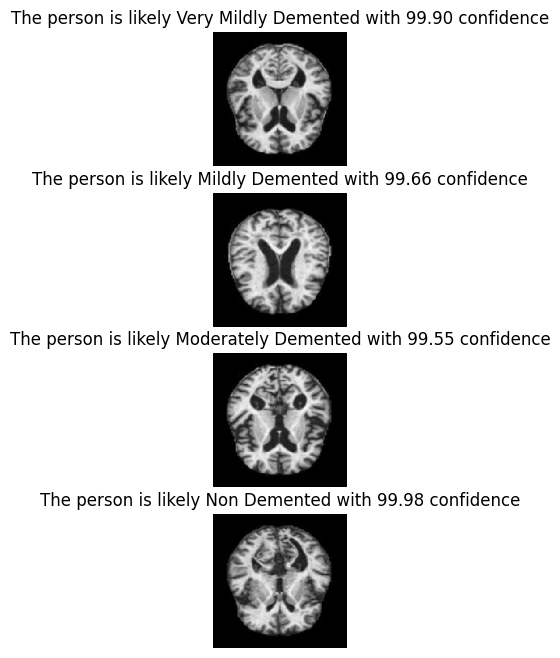

In [ ]:
img_arr = ["/content/drive/MyDrive/Projects/Mini project/data/Dataset/Very_Mild_Demented/verymild_1004.jpg",
           "/content/drive/MyDrive/Projects/Mini project/data/Dataset/Mild_Demented/mild_11.jpg",
           "/content/drive/MyDrive/Projects/Mini project/data/Dataset/Moderate_Demented/moderate_29.jpg",
           "/content/drive/MyDrive/Projects/Mini project/data/Dataset/Non_Demented/non_1012.jpg"]
plt.figure(figsize=(8,8))
for i in range(len(img_arr)):
  sample_1 = tf.keras.utils.load_img(img_arr[i],target_size=(width,height))
  sample = tf.keras.utils.img_to_array(sample_1)
  sample = np.array([sample])
  pred = model.predict(sample)
  score = tf.nn.softmax(pred[0])
  pred_label = class_dict[np.argmax(score)]
  conf = np.max(score)*100
  plt.subplot(4,1,i+1)
  plt.imshow(sample_1)
  plt.axis('off')
  plt.title("The person is likely "+pred_label+" with "+str(format(conf,'.2f'))+" confidence")

In [ ]:
model.save_weights("image.h5")

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    # tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(height_factor=(-0.3,-0.3),width_factor=(-0.5,-0.1))
])
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    # tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(height_factor=(-0.3,-0.3),width_factor=(-0.5,-0.1))
])

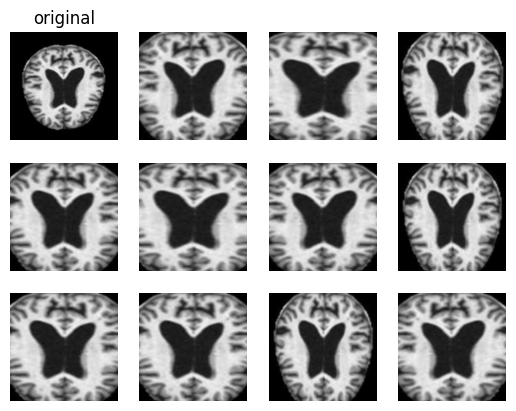

In [ ]:
for image,label in train_ds.take(1):
  plt.subplot(3,4,1)
  plt.imshow(image[0].numpy().astype('uint8'))
  plt.title('original')
  plt.axis('off')
  for i in range(11):
    ag_img = data_augmentation(image)
    plt.subplot(3,4,i+2)
    plt.imshow(ag_img[0].numpy().astype('uint8'))
    plt.axis('off')

# CNN model with data augmentation and dropout

In [ ]:
model1 = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1.0/255),
    tf.keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(128,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(len(classes),name='outputs')
])
model1.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model1.fit(train_ds,validation_data=val_ds,epochs=20)

In [ ]:
model1.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history = model1.fit(train_ds,validation_data=val_ds,epochs=20)

Epoch 1/20
160/160 [==============================] - 17s 94ms/step - loss: 1.1030 - accuracy: 0.4939 - val_loss: 0.9929 - val_accuracy: 0.5742
Epoch 2/20
160/160 [==============================] - 14s 88ms/step - loss: 0.9209 - accuracy: 0.5742 - val_loss: 0.8743 - val_accuracy: 0.5930
Epoch 3/20
160/160 [==============================] - 14s 88ms/step - loss: 0.8148 - accuracy: 0.6197 - val_loss: 0.7754 - val_accuracy: 0.6344
Epoch 4/20
160/160 [==============================] - 14s 88ms/step - loss: 0.7167 - accuracy: 0.6736 - val_loss: 0.7345 - val_accuracy: 0.6562
Epoch 5/20
160/160 [==============================] - 15s 91ms/step - loss: 0.6076 - accuracy: 0.7324 - val_loss: 0.6652 - val_accuracy: 0.7078
Epoch 6/20
160/160 [==============================] - 14s 89ms/step - loss: 0.5166 - accuracy: 0.7791 - val_loss: 0.4800 - val_accuracy: 0.7914
Epoch 7/20
160/160 [==============================] - 14s 88ms/step - loss: 0.4163 - accuracy: 0.8223 - val_loss: 0.3942 - val_accuracy:

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
ep_range = range(20)

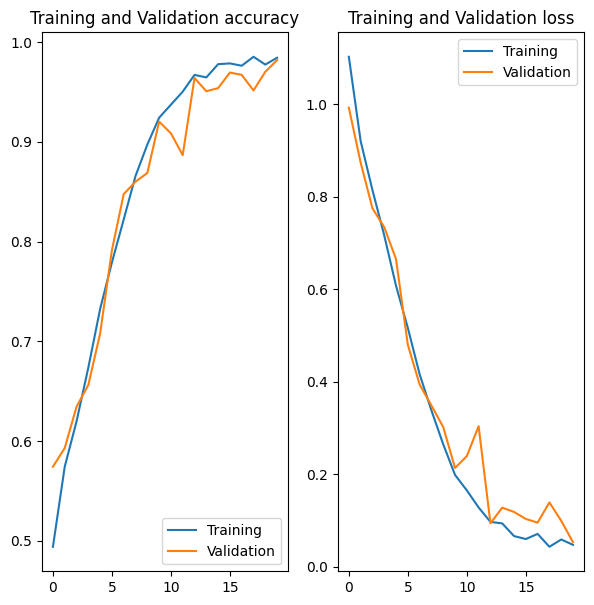

In [ ]:
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.title("Training and Validation accuracy")
plt.plot(ep_range,acc,label='Training')
plt.plot(ep_range,val_acc,label='Validation')
plt.legend(loc = "lower right")

plt.subplot(1,2,2)
plt.title("Training and Validation loss")
plt.plot(ep_range,loss,label='Training')
plt.plot(ep_range,val_loss,label='Validation')
plt.legend(loc="upper right")
plt.show()

In [ ]:
val_acc

In [ ]:
val_loss

1/1 [==============================] - 0s 43ms/step


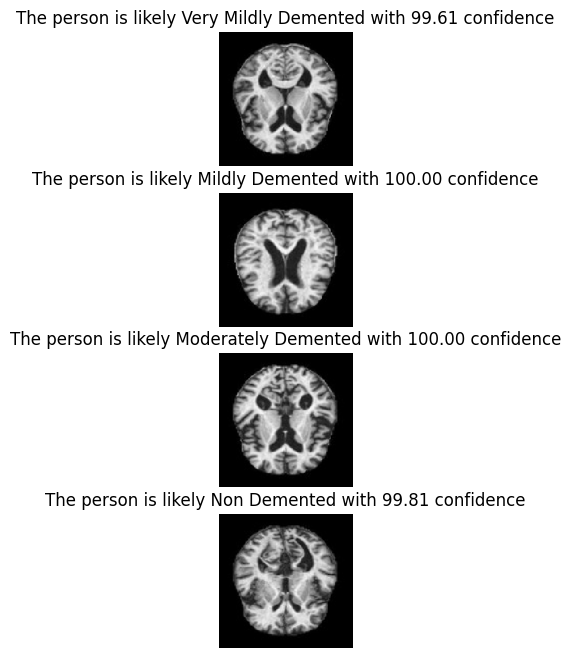

In [ ]:
img_arr = ["/content/drive/MyDrive/Projects/Mini project/data/Dataset/Very_Mild_Demented/verymild_1004.jpg",
           "/content/drive/MyDrive/Projects/Mini project/data/Dataset/Mild_Demented/mild_11.jpg",
           "/content/drive/MyDrive/Projects/Mini project/data/Dataset/Moderate_Demented/moderate_29.jpg",
           "/content/drive/MyDrive/Projects/Mini project/data/Dataset/Non_Demented/non_1012.jpg"]
plt.figure(figsize=(8,8))
for i in range(len(img_arr)):
sample_1 = tf.keras.utils.load_img(img,target_size=(width,height))
sample = tf.keras.utils.img_to_array(sample_1)
sample = np.array([sample])
pred = model1.predict(sample)
score = tf.nn.softmax(pred[0])
pred_label = class_dict[np.argmax(score)]
conf = np.max(score)*100
plt.subplot(4,1,i+1)
plt.imshow(sample_1)
plt.axis('off')
plt.title("The person is likely "+pred_label+" with "+str(format(conf,'.2f'))+" confidence")

# Transfer learning models

In [ ]:
val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take(val_batches//5)
validation_ds = val_ds.skip(val_batches//5)
val_batches, tf.data.experimental.cardinality(test_ds)

In [ ]:
train_dst = train_ds.prefetch(buffer_size=autotune)
test_dst = test_ds.prefetch(buffer_size=autotune)
val_dst = validation_ds.prefetch(buffer_size=autotune)

In [ ]:
base_model = tf.keras.applications.VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [ ]:
base_model.trainable = True

In [ ]:
for layer in base_model.layers[len(base_model.layers)-2:]:
  layer.trainable = False

In [ ]:
base_model.summary()

In [ ]:
flatten_layer = tf.keras.layers.Flatten()
dense_layer_1 = tf.keras.layers.Dense(512, activation='relu')
dense_layer_2 = tf.keras.layers.Dense(128, activation='relu')
prediction_layer = tf.keras.layers.Dense(4, activation='softmax')

In [ ]:
model2 = tf.keras.models.Sequential([
    base_model,
    flatten_layer,
    # dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
model2.summary()

In [ ]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model2.fit(train_dst,validation_data=val_dst,epochs=10)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
ep_range = range(10)

In [ ]:
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.title("Training and Validation accuracy")
plt.plot(ep_range,acc,label='Training')
plt.plot(ep_range,val_acc,label='Validation')
plt.legend(loc = "lower right")

plt.subplot(1,2,2)
plt.title("Training and Validation loss")
plt.plot(ep_range,loss,label='Training')
plt.plot(ep_range,val_loss,label='Validation')
plt.legend(loc="upper right")
plt.show()

In [ ]:
base_model1 = tf.keras.applications.VGG19(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [ ]:
base_model1.trainable = True

In [ ]:
base_model1.summary()

In [ ]:
model3 = tf.keras.models.Sequential([
    base_model1,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
model3.summary()

In [ ]:
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model3.fit(train_dst,validation_data=val_dst,epochs=10)

In [ ]:
img_arr = ["/content/verymild_21.jpg","/content/mild_8.jpg","/content/moderate_57.jpg","/content/non_9.jpg"]
plt.figure(figsize=(8,8))
for i in range(len(img_arr)):
  sample_1 = tf.keras.utils.load_img(img_arr[i],target_size=(width,height))
  sample = tf.keras.utils.img_to_array(sample_1)
  sample = np.array([sample])
  pred = model3.predict(sample)
  score = tf.nn.softmax(pred[0])
  pred_label = class_dict[np.argmax(score)]
  conf = np.max(score)*100
  plt.subplot(4,1,i+1)
  plt.imshow(sample_1)
  plt.axis('off')
  plt.title(str("The person is likely "+pred_label+" with "+str(format(conf,'.2f'))+" confidence"))